In [1]:
def getTableJson():
    """Retrieve a patent of the form PAT-<OrigFieldIdx>.R<reacant num>"""
    db = sqlite3.Connection('../../sqlStart/Abstracts_DB.db')
    cursor = db.execute("SELECT * FROM CONFERENCES")

    all_entries = []
    
    for confName, confID in cursor.fetchall():
        all_entries.append( {'confName':confName,
                             'confID':confID
                             } )
    return dict(data=all_entries)

In [1]:
import flask
import os
import sqlite3
import pandas as pd
import seaborn
from flask import Flask, request, session, g, redirect, url_for, abort, render_template, flash, jsonify

In [5]:
seaborn.__package__

'seaborn'

In [3]:
x = getTableJson()

In [4]:
x['data'][0].keys()

['confID', 'confName']

In [5]:
def getTotalPD(db):
    with sqlite3.connect(db) as con:
        cursor = con.cursor()
       
        cursor.execute("SELECT Conf, Year, Count(Conf) FROM ABSTRACTSTOTAL GROUP BY Year;")
        entries = cursor.fetchall()
        data = {'data' : entries}
    return data

In [6]:
d = getTotalPD("../../sqlStart/Abstracts_DB.db")

In [7]:
def getTotalPD(db):
    with sqlite3.connect(db) as con:
        cursor = con.cursor()
       
        cursor.execute("SELECT Conf, Year FROM ABSTRACTSTOTAL;")
        
        entries = cursor.fetchall()
        d = pd.DataFrame(entries, columns = ['conf', 'year'])
        d = d
        
        #data = {'data' : d}
    return d

In [8]:
e = getTotalPD("../../sqlStart/Abstracts_DB.db")

In [9]:
e

,conf,year
0,ECSA,2007
1,ECSA,2007
2,ECSA,2007
3,ECSA,2007
4,ECSA,2007
5,ECSA,2007
6,ECSA,2007
7,ECSA,2007
8,ECSA,2007
9,ECSA,2007


In [10]:
def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

def getTableJson2(table):
    
    with sqlite3.connect("../../sqlStart/Abstracts_DB.db") as con:
        con.row_factory = dict_factory
        cur = con.cursor()
        cur.execute("select * FROM %s" %table)
        entries = cur.fetchall()
        data = {'data' : entries}
    
    return data

In [11]:
y = getTableJson2('PUBLICATIONS')

In [12]:
y

{'data': [{'confName': u'ECSA', 'pubID': 1, 'year': 2007},
  {'confName': u'ECSA', 'pubID': 2, 'year': 2008},
  {'confName': u'ECSA', 'pubID': 3, 'year': 2009},
  {'confName': u'ECSA', 'pubID': 4, 'year': 2010},
  {'confName': u'ECSA', 'pubID': 5, 'year': 2011},
  {'confName': u'ECSA', 'pubID': 6, 'year': 2012},
  {'confName': u'ECSA', 'pubID': 7, 'year': 2013},
  {'confName': u'ECSA', 'pubID': 8, 'year': 2014},
  {'confName': u'QoSA', 'pubID': 9, 'year': 2005},
  {'confName': u'QoSA', 'pubID': 10, 'year': 2006},
  {'confName': u'QoSA', 'pubID': 11, 'year': 2007},
  {'confName': u'QoSA', 'pubID': 12, 'year': 2008},
  {'confName': u'QoSA', 'pubID': 13, 'year': 2009},
  {'confName': u'QoSA', 'pubID': 14, 'year': 2010},
  {'confName': u'QoSA', 'pubID': 15, 'year': 2011},
  {'confName': u'QoSA', 'pubID': 16, 'year': 2012},
  {'confName': u'QoSA', 'pubID': 17, 'year': 2013},
  {'confName': u'QoSA', 'pubID': 18, 'year': 2014},
  {'confName': u'WICSA', 'pubID': 19, 'year': 2004},
  {'confName

In [14]:
#@App.route("/jsonContents", methods = ('GET',))
def getContents():
    with sqlite3.connect(mydb) as con:
    
        cursor = con.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        mytables = (cursor.fetchall())
        myt = []
        for x in mytables[1:]:
            table_entry = {}
            table_name = x[0]
            table_entry['name'] = table_name
            html = 'http://127.0.0.1:5000/totals/%s' % table_name
            table_entry['html'] = "<a href='%s'<button>click</button>></a>" %html
            table_entry['count'] = cursor.execute("SELECT COUNT(*) FROM %s"%table_name).fetchone()[0]
        
            myt.append(table_entry) 
            
    return jsonify(dict(data = myt))
    #render_template('/jsonContents.html')

In [15]:
import sys, os, logging
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
sns.set(color_codes=True)
import welcome_flask3 as wel
wel = reload(wel)

(1548, 7)
(1548, 7)


In [20]:
import pandas as pd
from cStringIO import StringIO
import base64

In [45]:
def getPie(df, conference):
    
    
    fig = df.plot(kind = 'pie', colormap = 'ocean', title = conference, subplots = True,legend = False)
   
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
    
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())

    return data

def getBar(df, conference):

    fig = sns.barplot(x = df['year'], y = df['Conf'], palette = "Greens")
        

    #fig =  df.plot(kind = 'bar', colormap = 'ocean', title = conference, subplots = True,legend = False)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())

    return fig


In [46]:
def getContentsconf(db):
    with sqlite3.connect(db) as con:
        sqlcmd = "SELECT Conf, Year FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        myt = []
    
        
        conferences = list(df['Conf'].unique())
    
   
        for conf in conferences:
        
            entry = {}
            entry['conf'] = conf
        
        
            subDF = df.query('Conf == "%s"' % conf).groupby('year').count()
            entry['counts'] = subDF.to_html()
            
            #image = getPieOne(subDF, conf)
            #entry['Pie']  = image
            subDF.reset_index(inplace = True)
            image2 = getBar(subDF, conf)
            entry['Bar'] = image2
        
            myt.append(entry)
    
    return dict(data = myt)

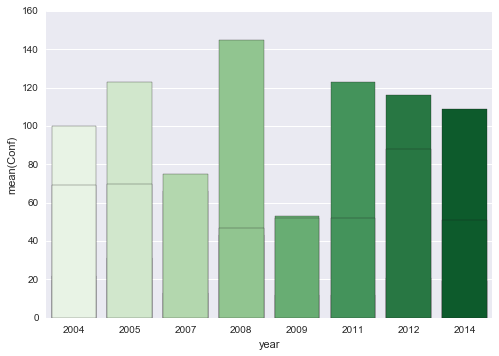

In [47]:
data = getContentsconf("../../sqlStart/Abstracts_DB.db")

In [25]:
total = wel.getTotalPD("../../sqlStart/Abstracts_DB.db")

(1548, 7)


In [26]:
total.head()

,Abstract,Author affiliation,Authors,Conf,Title,terms,year
0,Empirical software engineering focuses on the ...,"DISP, Univ of Rome, Rome, Italy","['Falessi, D', '', '', ' Kruchten, P', ' Canto...",ECSA,Issues in applying empirical software engineer...,"['software architecture', 'software quality', ...",2007
1,Software architecture description languages al...,"LSTS ENIT, Tunis, Tunisia","['Jerad, C', '', '', ' Barkaoui, K', ' Grissa ...",ECSA,Hierarchical verification in Maude of LfP soft...,"['formal verification', 'rewriting systems', '...",2007
2,When an application must evolve to cope with n...,"INRIA, Univ des Sci et Technol de Lille, Vi...","['Waignier, G', '', '', ' Le Meur, A', 'F', ''...",ECSA,FIESTA a generic framework for integrating ne...,"['formal specification', 'software architectur...",2007
3,"Ageless software evolves, to meet new requirem...","Sch of Comput Sci , Univ of Adelaide, Adela...","['Falkner, K', '', '', ' Balasubramaniam, D', ...",ECSA,Informed evolution,"['software architecture', 'software prototypin...",2007
4,The past 20 years has seen significant investm...,"Software Group, IBM, Raleigh, NC, United States","['Brown, A W', '', '', ' McDermid, J A']",ECSA,The art and science of software architecture,"['safety-critical software', 'software archite...",2007


In [28]:
total[['Abstract']].to_html()

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Abstract</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Empirical software engineering focuses on the ...</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Software architecture description languages al...</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>When an application must evolve to cope with n...</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Ageless software evolves, to meet new requirem...</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>The past 20 years has seen significant investm...</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Many issues must be taken into account in orde...</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Prototyping service oriented architectures bas...</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>Web Services based technologies have emerged a...</td>\n    </t

In [41]:
def getPapersKWgroup(grouper):
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear FROM PAPER "
        paperdf = pd.read_sql_query(sqlcmd, con)
        sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        kwdf = pd.read_sql_query(sqlcmd2, con)
        
        merged = kwdf.merge(paperdf, on = 'paperID')
        
        subgrp = merged.groupby(grouper)
        
        return subgrp
    
def getPaperKW(data_frame):
    entries = []
    for each in data_frame.groups:
        entry = {}
        entry['paperID'] = each
        entry['keywords'] = [str(eval(key)) for key in data_frame.get_group(each)['keyword']]
        entries.append(entry)
    return dict(data = entries)

In [6]:
mydb  = "../../sqlStart/Abstracts_DB.db"

In [7]:
PaperKW = getPapersKWgroup('paperID')

In [42]:
t = getPaperKW(getPapersKWgroup('paperID'))

In [44]:
t

{'data': [{'keywords': ['Research challenges',
    'Software product line architecture',
    'Materials Science',
    'Structural properties',
    'Software product lines',
    'Software systems',
    'Software design',
    'Product-lines',
    'Computer Programming',
    'Feature models',
    'Structural Design'],
   'paperID': 1},
  {'keywords': ['Model transformation',
    'Design complexity',
    'Computer software',
    'Architectural decision',
    'Data Handling and Applications',
    'Product architecture',
    'Computer Systems and Equipment',
    'Software product lines',
    'Computer Programming',
    'Feature models',
    'Application engineering',
    'Computer Software',
    'Domain knowledge',
    'Computer Applications',
    'Buildings and Towers',
    'Software Product Line',
    'Architecture',
    'Model-driven Engineering',
    'Meshing tools',
    'Domain engineering',
    'Software design',
    'Evolvability',
    'Product line architecture',
    'Network archite

In [20]:
PaperKW.head()

,paperID,keyword,title,confName,pubYear
0,1,u'Research challenges',On the need of safe software product line arch...,ECSA,2010
1,1,u'Software product line architecture',On the need of safe software product line arch...,ECSA,2010
2,1,u'Materials Science',On the need of safe software product line arch...,ECSA,2010
3,1,u'Structural properties',On the need of safe software product line arch...,ECSA,2010
4,1,u'Software product lines',On the need of safe software product line arch...,ECSA,2010
11,2,u'Model transformation',Feature model to product architectures Applyi...,ECSA,2009
12,2,u'Design complexity',Feature model to product architectures Applyi...,ECSA,2009
13,2,u'Computer software',Feature model to product architectures Applyi...,ECSA,2009
14,2,u'Architectural decision',Feature model to product architectures Applyi...,ECSA,2009
15,2,u'Data Handling and Applications',Feature model to product architectures Applyi...,ECSA,2009
